In [1]:
#Importing libraries
import pandas as pd
from tabulate import tabulate
%pip install matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\denis\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
#reading the datasets into environment
EconomicDF = pd.read_csv("C:/Users/denis/OneDrive/VSCode/Git/culminating-project-group-2/WEEK 4/EconomicData106.csv")
EnviornmentDF = pd.read_csv("C:/Users/denis/OneDrive/VSCode/Git/culminating-project-group-2/Database/DataSources/World Development Indicators (WDI)/Envirnmental_Indicators.csv")
SocialDF = pd.read_csv('C:/Users/denis/OneDrive/Documents/GitHub/culminating-project-group-2/Database/DataSources/World Development Indicators (WDI)/social_Indicators_unemployement.csv')

In [3]:
#standardizing naming conventions
EconomicDF = EconomicDF.rename(columns={"Country Name": "Country", "Country Code": "Code"})
EnviornmentDF = EnviornmentDF.rename(columns={"Country Name": "Country", "Country Code": "Code"})
SocialDF = SocialDF.rename(columns={"Country Name": "Country", "Country Code": "Code"})

In [ ]:
#dropping columns that are not needed in economic data
columnsInterest = ['Country', 'Time', 'GDP (Current $)', 'GDP Growth (Yrly %)', 'GDP per Capita (Current $)', 'Adjusted Net National Income(Yrly % Growth)',
 'Adjusted Net Natiobnal Income (Constant)', 'Adjusted Net National Income (Current)', 'Service Exports (Current $)', 'Service Imports (Current $)']
EconomicDF = EconomicDF[columnsInterest]

In [5]:
#merge dataframes on country and year
MergedDF = pd.merge(EconomicDF, EnviornmentDF, on=["Country", "Time"], how="inner")
MergedDF = pd.merge(MergedDF, SocialDF, on=["Country", "Time"], how="inner")

In [ ]:
MergedDF.isnull().sum()

Country                                                                                                                       0
Time                                                                                                                          0
GDP (Current $)                                                                                                               0
GDP Growth (Yrly %)                                                                                                           0
GDP per Capita (Current $)                                                                                                    0
Adjusted Net National Income(Yrly % Growth)                                                                                   0
Adjusted Net Natiobnal Income (Constant)                                                                                      0
Adjusted Net National Income (Current)                                                                  

In [ ]:
#determining shape of the merged dataframe
print("Shape merged dataframe:", MergedDF.shape)

Shape of the merged dataframe: (318, 42)


In [8]:
#drop redundant columns
MergedDF = MergedDF.drop(columns=["Code_x", "Code_y", "Time Code_x", "Time Code_y"])

In [9]:
MergedDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 38 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                      --------------  -----  
 0   Country                                                                                                                     318 non-null    object 
 1   Time                                                                                                                        318 non-null    float64
 2   GDP (Current $)                                                                                                             318 non-null    object 
 3   GDP Growth (Yrly %)                                                                                                         3

In [10]:
MergedDF.head(20)

,Country,Time,GDP (Current $),GDP Growth (Yrly %),GDP per Capita (Current $),Adjusted Net National Income(Yrly % Growth),Adjusted Net Natiobnal Income (Constant),Adjusted Net National Income (Current),Service Exports (Current $),Service Imports (Current $),...,"Unemployment, male (% of male labor force) (modeled ILO estimate) [SL.UEM.TOTL.MA.ZS]","Unemployment, male (% of male labor force) (national estimate) [SL.UEM.TOTL.MA.NE.ZS]","Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate) [SL.UEM.1524.FE.ZS]","Unemployment, youth female (% of female labor force ages 15-24) (national estimate) [SL.UEM.1524.FE.NE.ZS]","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate) [SL.UEM.1524.MA.ZS]","Unemployment, youth male (% of male labor force ages 15-24) (national estimate) [SL.UEM.1524.MA.NE.ZS]","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate) [SL.UEM.1524.ZS]","Unemployment, youth total (% of total labor force ages 15-24) (national estimate) [SL.UEM.1524.NE.ZS]"
0,Albania,2021.0,18032010564,8.969553392,6413.283286,11.05709518,11130019640,14797555219,4117323974,1995919701,...,11.307,11.309,11.474,11.474,30.076,29.173,25.414,25.44,27.244,27.069
1,Albania,2022.0,19017242586,4.826688314,6846.426143,..,..,..,5019488987,2512777696,...,9.917,10.398,10.137,10.785,27.087,25.502,23.247,23.775,24.735,24.538
2,Albania,2023.0,23547179830,3.936625257,8575.171134,..,..,..,7114203250,3477656983,...,9.888,10.421,10.108,10.669,27.186,26.259,23.325,24.778,24.817,25.419
3,Argentina,2021.0,4.86564E+11,10.44181199,10738.01792,12.48955577,4.88631E+11,4.11983E+11,9588735678,13288827176,...,7.915,7.893,8.736,8.736,26.688,26.676,21.008,20.772,23.373,23.239
4,Argentina,2022.0,6.3279E+11,5.269879674,13935.68111,..,..,..,14413679146,21236582139,...,6.145,6.127,6.805,6.805,20.723,20.861,17.745,17.597,19.004,18.971
5,Argentina,2023.0,6.46075E+11,-1.611001621,14187.48273,..,..,..,16110565249,22526462141,...,5.641,5.628,6.139,6.139,19.379,19.459,16.867,16.7,17.946,17.886
6,Armenia,2021.0,13878908629,5.800000001,4685.179971,2.40277797,10551045918,11228790134,1763282838,1373761014,...,15.711,7.578,15.469,8.418,33.311,28.773,27.938,20.373,30.532,24.289
7,Armenia,2022.0,19513506553,12.6,6571.974455,..,..,..,4406479991,2687936533,...,14.099,..,13.379,..,28.004,..,24.873,..,26.354,..
8,Armenia,2023.0,24085749592,8.3,8053.010663,..,..,..,5690483460,3369553414,...,13.957,..,13.245,..,27.768,..,24.67,..,26.135,..
9,Australia,2021.0,1.55674E+12,2.111168148,60607.77886,..,..,1.1741E+12,45035585027,41314615172,...,5.209,5.163,5.116,5.023,9.817,9.747,12.611,12.512,11.248,11.156


In [11]:
#converting Country into categorical variable
MergedDF['Country'] = MergedDF['Country'].astype('category')

In [12]:
#converting columns to numeric
MergedDF['GDP (Current $)'] = pd.to_numeric(MergedDF['GDP (Current $)'], errors='coerce')
MergedDF['GDP Growth (Yrly %)'] = pd.to_numeric(MergedDF['GDP Growth (Yrly %)'], errors='coerce')
MergedDF['GDP per Capita (Current $)'] = pd.to_numeric(MergedDF['GDP per Capita (Current $)'], errors='coerce')
MergedDF['Adjusted Net National Income(Yrly % Growth)'] = pd.to_numeric(MergedDF['Adjusted Net National Income(Yrly % Growth)'], errors='coerce')
MergedDF['Adjusted Net Natiobnal Income (Constant)'] = pd.to_numeric(MergedDF['Adjusted Net Natiobnal Income (Constant)'], errors='coerce')
MergedDF['Adjusted Net National Income (Current)'] = pd.to_numeric(MergedDF['Adjusted Net National Income (Current)'], errors='coerce')
MergedDF['Service Exports (Current $)'] = pd.to_numeric(MergedDF['Service Exports (Current $)'], errors='coerce')
MergedDF['Service Imports (Current $)'] = pd.to_numeric(MergedDF['Service Imports (Current $)'], errors='coerce')

In [15]:
MergedDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 38 columns):
 #   Column                                                                                                   Non-Null Count  Dtype   
---  ------                                                                                                   --------------  -----   
 0   Country                                                                                                  318 non-null    category
 1   Time                                                                                                     318 non-null    float64 
 2   GDP (Current $)                                                                                          316 non-null    float64 
 3   GDP Growth (Yrly %)                                                                                      316 non-null    float64 
 4   GDP per Capita (Current $)                                                      

In [14]:
#dropping characters inside [ ] in the column names
MergedDF.columns = MergedDF.columns.str.replace(r'\[.*?\]', '', regex=True)


In [16]:
MergedDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 38 columns):
 #   Column                                                                                                   Non-Null Count  Dtype   
---  ------                                                                                                   --------------  -----   
 0   Country                                                                                                  318 non-null    category
 1   Time                                                                                                     318 non-null    float64 
 2   GDP (Current $)                                                                                          316 non-null    float64 
 3   GDP Growth (Yrly %)                                                                                      316 non-null    float64 
 4   GDP per Capita (Current $)                                                      

In [17]:
#convert all objects to numeric
for col in MergedDF.columns:
    if MergedDF[col].dtype == 'object':
        MergedDF[col] = pd.to_numeric(MergedDF[col], errors='coerce')

In [18]:
MergedDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 38 columns):
 #   Column                                                                                                   Non-Null Count  Dtype   
---  ------                                                                                                   --------------  -----   
 0   Country                                                                                                  318 non-null    category
 1   Time                                                                                                     318 non-null    float64 
 2   GDP (Current $)                                                                                          316 non-null    float64 
 3   GDP Growth (Yrly %)                                                                                      316 non-null    float64 
 4   GDP per Capita (Current $)                                                      

In [ ]:
#identifying data types and missing values in one table
#Getting the data types
dtypes = MergedDF.dtypes

#Getting the number of missing values
missingValues = MergedDF.isna().sum()

#Creating a new DataFrame for combined information
info = pd.DataFrame({
    'Column': dtypes.index,
    'DataType': dtypes.values,
    'MissingValues': missingValues.values
})

#Converting DataFrame to table format with right alignment
table = tabulate(info, headers='keys', tablefmt='pretty', showindex=False, colalign=("right", "right", "right"))
print(table)

+--------------------------------------------------------------------------------------------------------+----------+---------------+
|                                                                                                 Column | DataType | MissingValues |
+--------------------------------------------------------------------------------------------------------+----------+---------------+
|                                                                                                Country | category |             0 |
|                                                                                                   Time |  float64 |             0 |
|                                                                                        GDP (Current $) |  float64 |             2 |
|                                                                                    GDP Growth (Yrly %) |  float64 |             2 |
|                                                             

In [20]:
MergedDF.shape

(318, 38)

In [22]:
#create new dataframe with only the columns of interest
EconomicDF2 = MergedDF[['Country', 'Time', 'GDP (Current $)', 'GDP Growth (Yrly %)', 'GDP per Capita (Current $)']]

In [23]:
#export the cleaned data to a new csv file
EconomicDF2.to_csv('EconomicDataFinal.csv', index=False)

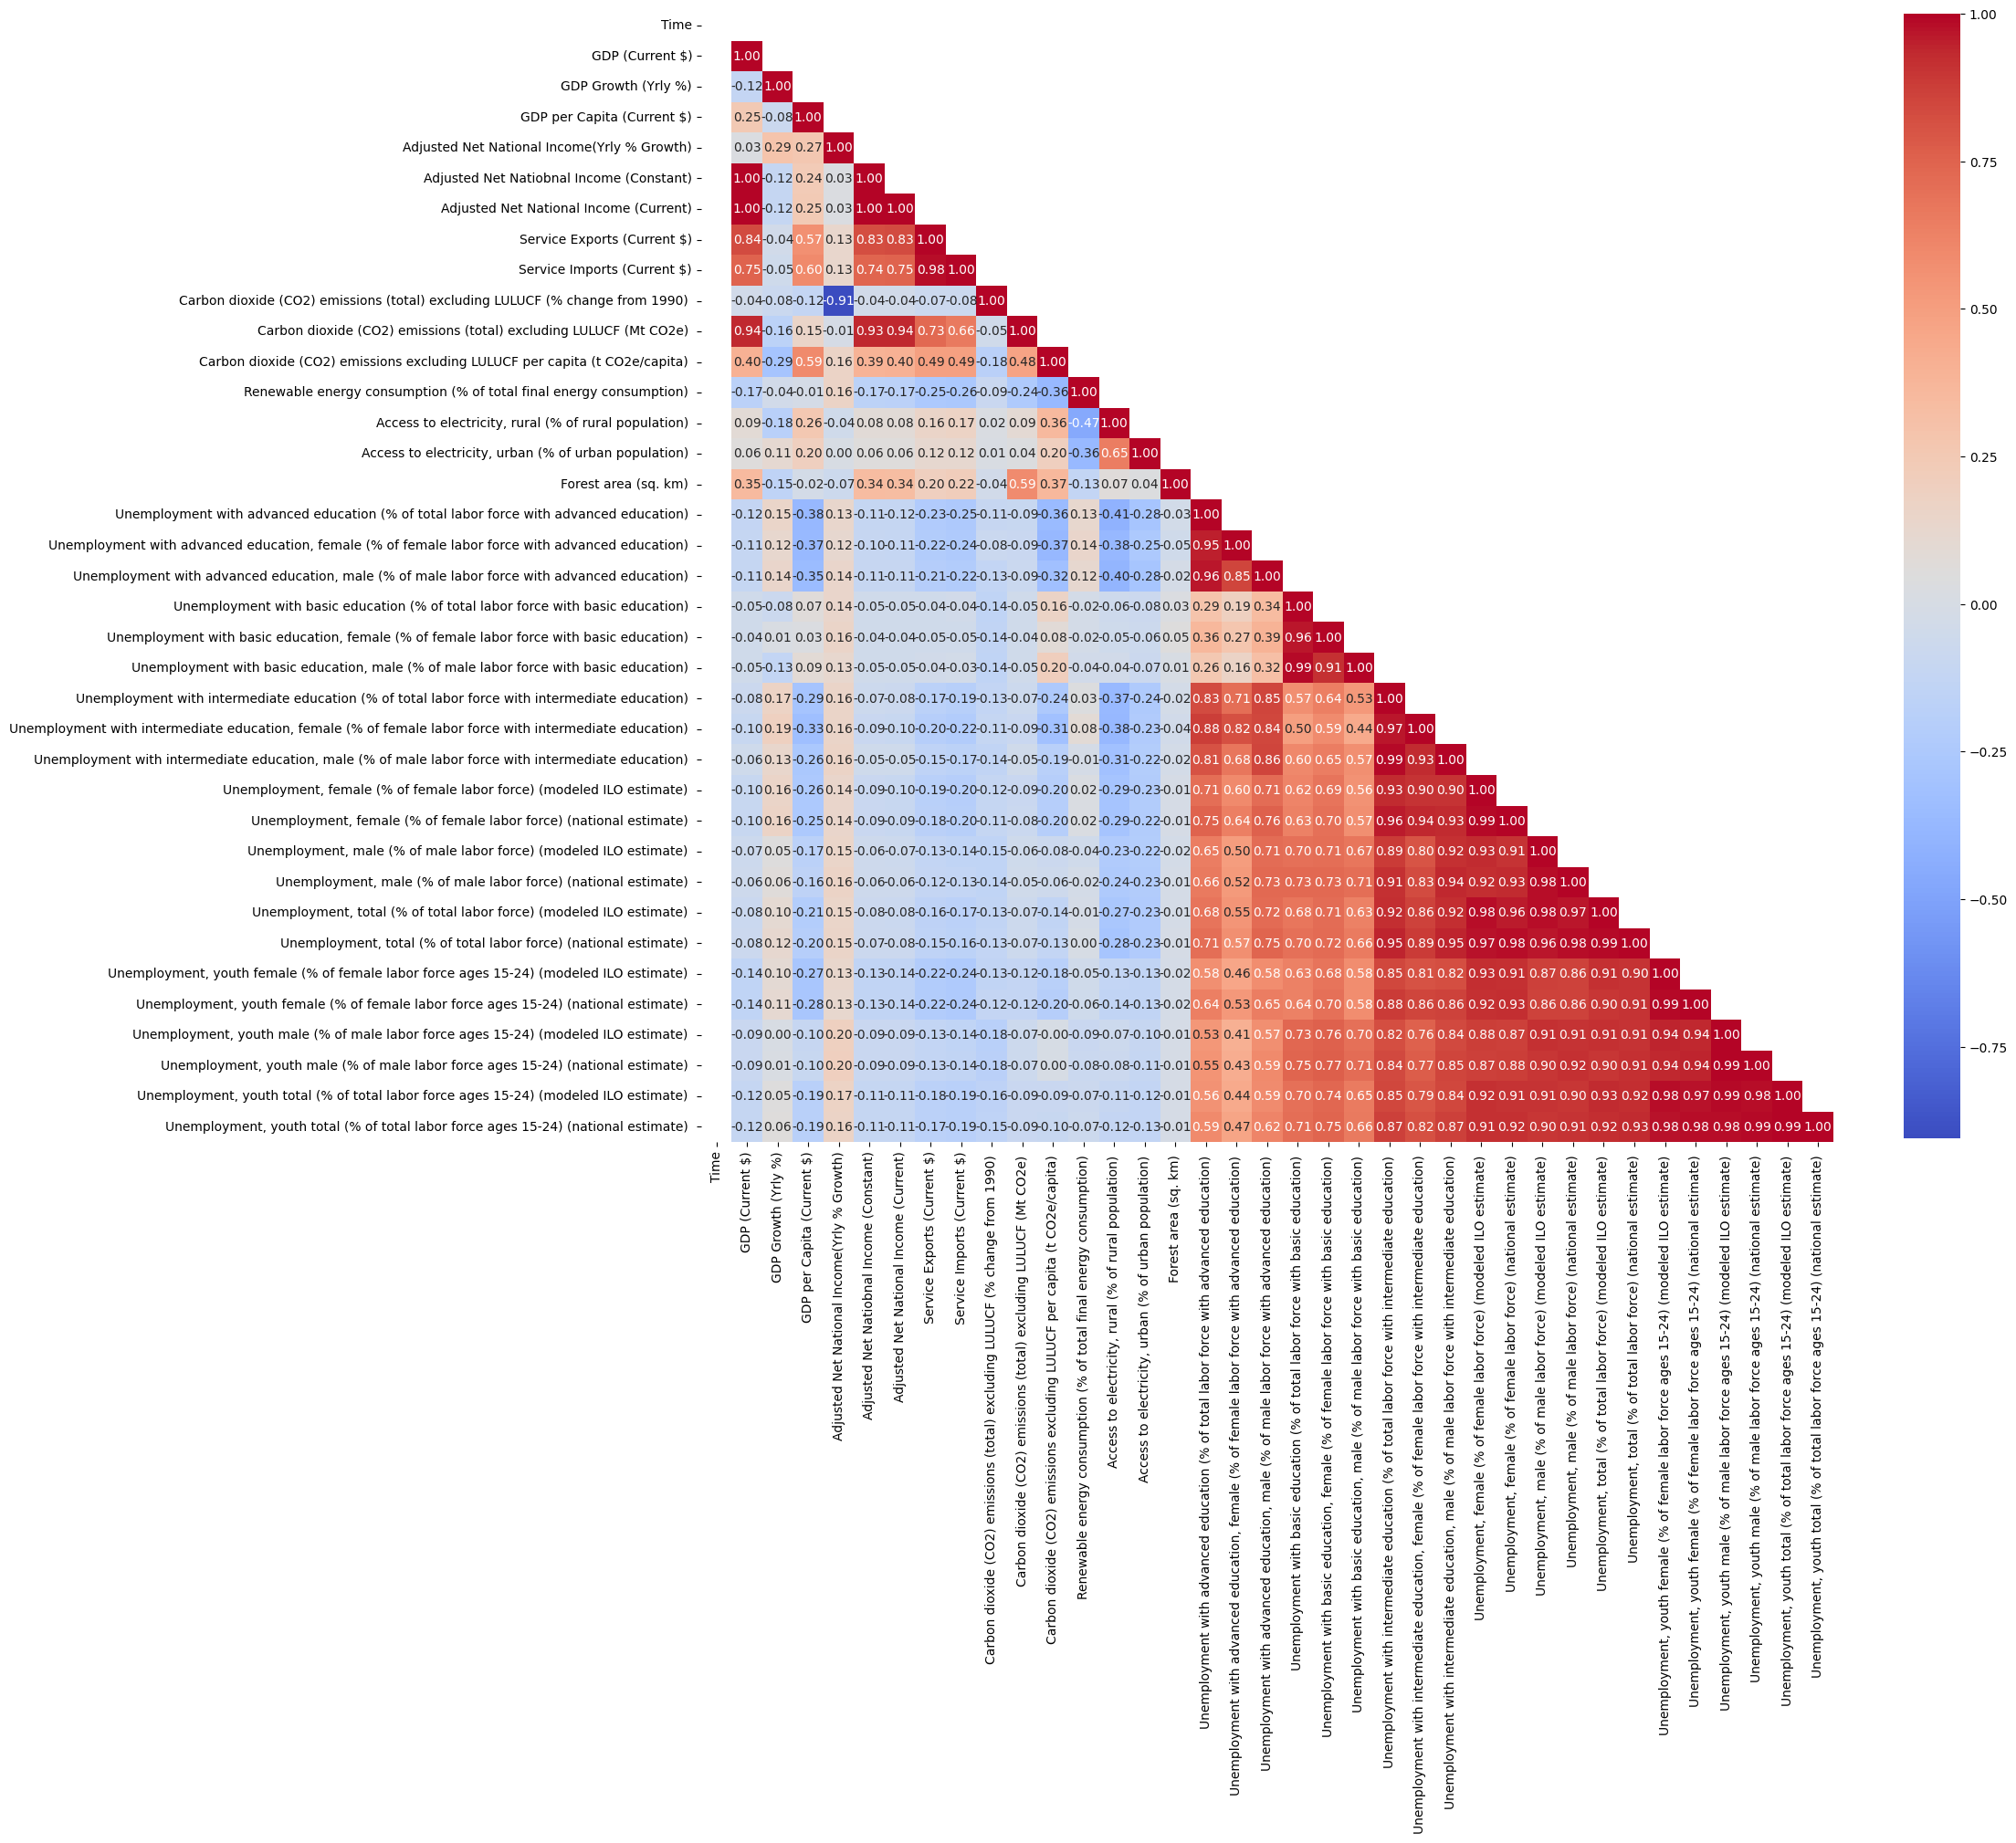

In [ ]:
# Selecting only numeric columns for correlation calculation
numericColumns = MergedDF.select_dtypes(include=['float64', 'int64'])
correlationMatrix = numericColumns.corr()

matrix = np.triu(correlationMatrix.corr(), k=1)

plt.figure(figsize=(20, 20))
sns.heatmap(correlationMatrix, mask=matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.show()